#             EDA On IoT Network Intrusion Dataset





### I got dataset from [here](https://ocslab.hksecurity.net/Datasets/iot-network-intrusion-dataset) , special thanks to Hyunjae Kang, Huy Kang Kim and their theam for creating this data.

I downloaded all .pcap files to my pc and by applying filters of each type of attack(according to dataset discription.xlsx) in Wireshark and exporting just attack packets, I merged each group of exported pcap files and commpresed them as "iot-pcaps.rar" with Winrar, and uploaded to my GDrive to access it frome here. So, I think you should do this too.
All aggregated pcap files:


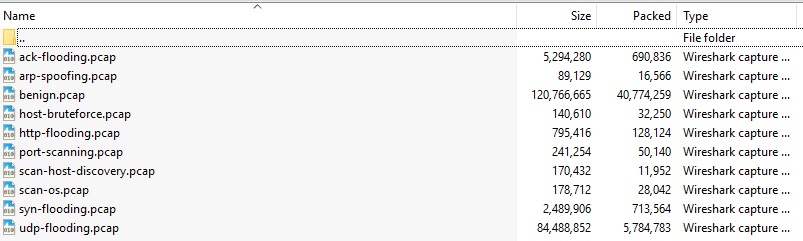

If there was any questions, feel free and contact me:
meysamamini7394@gmail.com

# Extracting network conversations from pcap files using Argus

### In this step we will install Argus and use it for extracting network flows data. So befor this part, I highly recommend you to take a look at Argus documentations at [openargus.org](https://openargus.org/documentation).


 ## Mounting gdrive and copy pcaps to working directory:

In [ ]:
from google.colab import drive
from IPython.display import clear_output
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
cd /content/sample_data

/content/sample_data


In [ ]:
!rm -r workspace

rm: cannot remove 'workspace': No such file or directory


In [ ]:
!mkdir workspace

In [ ]:
cd workspace

/content/sample_data/workspace


In [ ]:
!mkdir data

In [ ]:
pwd

'/content/sample_data/workspace'

In [ ]:
cd ../../../gdrive/MyDrive/

[Errno 2] No such file or directory: '../../../gdrive/MyDrive/'
/content/sample_data/workspace


In [ ]:
!cp 'iot-pcaps.rar' '/content/sample_data/workspace/data/'

cp: cannot stat 'iot-pcaps.rar': No such file or directory


## Getting Argus from [Qosient](https://qosient.com/argus/downloads.shtml) and installing needed libraries

In [ ]:
cd /content/sample_data/

/content/sample_data


In [ ]:
#argus:
!wget http://qosient.com/argus/src/argus-3.0.8.2.tar.gz
!tar -zxvf argus-3.0.8.2.tar.gz
!rm argus-3.0.8.2.tar.gz
clear_output()

In [ ]:
#argus clients , like ra , ra cluster , ...
!wget http://qosient.com/argus/src/argus-clients-3.0.8.2.tar.gz
!tar -zxvf argus-clients-3.0.8.2.tar.gz
!rm argus-clients-3.0.8.2.tar.gz
clear_output()

In [ ]:
# Installing necessery libraries according to 'INSTALL' file 
! apt install flex bison libpcap-dev
clear_output()

### And finally building and installing Argus

In [ ]:
cd  /content/sample_data/argus-3.0.8.2

/content/sample_data/argus-3.0.8.2


In [ ]:
! ./configure 
!make 
clear_output()

In [ ]:
! make install
clear_output()

In [ ]:
cd /content/sample_data/argus-clients-3.0.8.2

/content/sample_data/argus-clients-3.0.8.2


In [ ]:
! ./configure 
!make
clear_output()

In [ ]:
!make install
clear_output()

In [ ]:
pwd

'/content/sample_data/workspace/argus-clients-3.0.8.2'

In [ ]:
!apt install axel
clear_output()

### Unziping pcap files

In [ ]:
cd /content/sample_data/workspace/data/

/content/sample_data/workspace/data


In [ ]:
#crating a directory for csv files
!mkdir csv

In [ ]:
!unrar x 'iot-pcaps.rar'
clear_output()

In [ ]:
#we dont need .rar file anymore
! rm iot-pcaps.rar

## Now we have access to Argus and it's Clients, like 'ra'

In [ ]:
import os
from glob import glob as g
pcap_file="benign.pcap"
argus_file="benign.argus"
csv_file="benign.csv"
csv_directory_path="/content/sample_data/workspace/data/csv/"
output_path=os.path.join(csv_directory_path ,csv_file ) 

In [ ]:
#creating a .argus file from a .pcap file and after that we can get traffic flows of 'benign-dec.pcap' in csv format
! argus -r $pcap_file -w $argus_file

In [ ]:
# extracting flow records as csv from .argus file with 'ra' client, and here we are
#just want default features of flows
! ra -r $argus_file -c , > $output_path
!rm $argus_file

### We Made It \\( َ' o َ')/   this is just the beginning

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm
benign=pd.read_csv(output_path)
benign.head()

,StartTime,Flgs,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,TotPkts,TotBytes,State
0,08:56:14.859557,e s,tcp,192.168.0.13,9020,<?>,192.168.0.16,49784,1827,1584998,CON
1,08:56:15.320023,e,tcp,192.168.0.13,9020,?>,192.168.0.16,49668,1,1506,RST
2,08:56:15.560491,e,udp,108.177.97.189,443,->,192.168.0.14,50510,1,110,INT
3,08:56:15.952551,e,tcp,192.168.0.13,169,?>,248.250.9.234,40795,1,1502,RST
4,08:56:15.952631,e,tcp,190.12.178.12,9088,?>,192.168.0.16,35229,1,1502,CON


In [ ]:
benign.shape

(911, 11)

In [ ]:
# Lets generates .csv file with whole(most of meaningful ones)desirable features:

csv_file="benign_all_features.csv"
pcap_file="benign.pcap"
csv_directory_path="/content/sample_data/workspace/data/csv/"
output_path=os.path.join(csv_directory_path ,csv_file ) 
argus_file="benign_all_features.argus"

!argus -r $pcap_file -w $argus_file

!ra -r $argus_file -z -s stos dtos \
saddr daddr flgs tcpopt sport \
dport bytes sbytes dbytes trans proto \
pkts spkts dpkts sload dload sloss dloss \
sretrans dretrans sgap dgap swin dwin \
tcprtt synack ackdat smeansz dmeansz \
state sttl dttl shops dhops dur mean sum \
srate drate -c , > $output_path

!rm $argus_file

In [ ]:
benign=pd.read_csv(output_path)
benign.head()

,sTos,dTos,SrcAddr,DstAddr,Flgs,TcpOpt,Sport,Dport,TotBytes,SrcBytes,DstBytes,Trans,Proto,TotPkts,SrcPkts,DstPkts,SrcLoad,DstLoad,SrcLoss,DstLoss,SrcRetra,DstRetra,SrcGap,DstGap,SrcWin,DstWin,TcpRtt,SynAck,AckDat,sMeanPktSz,dMeanPktSz,State,sTtl,dTtl,sHops,dHops,Dur,Mean,Sum,SrcRate,DstRate
0,2.0,0.0,192.168.0.13,192.168.0.16,e s,T,9020,49784,1584998,1520464,64534,1,tcp,1827,1254,573,2431064.75,103086.289062,607,0,0,0,0.0,6112419.0,1869.0,32715.0,0.0,0.0,0.0,1212.491211,112.624779,E,64.0,64.0,0.0,0.0,4.999462,4.999462,4.999462,250.626968,114.412308
1,2.0,NaN,192.168.0.13,192.168.0.16,e,NaN,9020,49668,1506,1506,0,1,tcp,1,1,0,0.00,0.000000,0,0,0,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1506.000000,0.000000,R,64.0,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,NaN,108.177.97.189,192.168.0.14,e,NaN,443,50510,110,110,0,1,udp,1,1,0,0.00,0.000000,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,110.000000,0.000000,INT,54.0,NaN,10.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.0,NaN,192.168.0.13,248.250.9.234,e,NaN,169,40795,1502,1502,0,1,tcp,1,1,0,0.00,0.000000,0,0,0,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1502.000000,0.000000,R,64.0,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
4,2.0,NaN,190.12.178.12,192.168.0.16,e,NaN,9088,35229,1502,1502,0,1,tcp,1,1,0,0.00,0.000000,0,0,0,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1502.000000,0.000000,E,64.0,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
benign.shape

(911, 41)

In [ ]:
cd /content/sample_data/workspace/data/csv

/content/sample_data/workspace/data/csv


In [ ]:
!rm benign.csv
!rm benign_all_features.csv

In [ ]:
pcaps = g('/content/sample_data/workspace/data/*.pcap')

In [ ]:
pcaps

['/content/sample_data/workspace/data/benign.pcap',
 '/content/sample_data/workspace/data/port-scanning.pcap',
 '/content/sample_data/workspace/data/udp-flooding.pcap',
 '/content/sample_data/workspace/data/syn-flooding.pcap',
 '/content/sample_data/workspace/data/scan-os.pcap',
 '/content/sample_data/workspace/data/host-bruteforce.pcap',
 '/content/sample_data/workspace/data/ack-flooding.pcap',
 '/content/sample_data/workspace/data/http-flooding.pcap',
 '/content/sample_data/workspace/data/scan-host-discovery.pcap',
 '/content/sample_data/workspace/data/arp-spoofing.pcap']

In [ ]:
(pcaps[0].split('/')[-1]).split('.')[0]

'benign'

#### Extracting all csv files

In [ ]:
cd /content/sample_data/workspace/data

/content/sample_data/workspace/data


In [ ]:
for file in tqdm(pcaps):

  name=(file.split('/')[-1]).split('.')[0]

  pcap_file=f"{name}.pcap"
  argus_file=f"{name}.argus"
  csv_file=f"{name}.csv"
  csv_directory_path="/content/sample_data/workspace/data/csv/"
  output_path=os.path.join(csv_directory_path ,csv_file ) 

  !argus -r $pcap_file -m -w $argus_file

  !ra -r $argus_file -z -s \
  saddr daddr  smac dmac sport dport state \
  proto dur srate drate \
  smeansz dmeansz \
  -c , > $output_path

  !rm $argus_file
  # stos dtos

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
cd /content/sample_data/workspace/data/csv

/content/sample_data/workspace/data/csv


In [ ]:
import pandas as pd
normal=pd.read_csv('benign.csv')

In [ ]:
# attaks_csv_pathes1=g('/content/sample_data/workspace/data/syn*.csv')
# syn_flooding = pd.concat(map(pd.read_csv,attaks_csv_pathes1))
syn_flooding=pd.read_csv('syn-flooding.csv')
ack_flooding=pd.read_csv('ack-flooding.csv')
host_bruteforce=pd.read_csv('host-bruteforce.csv')
http_flooding=pd.read_csv('http-flooding.csv')
udp_flooding=pd.read_csv('udp-flooding.csv')
arp_spoofing=pd.read_csv('arp-spoofing.csv')
port_scanning=pd.read_csv('port-scanning.csv')
scan_os=pd.read_csv('scan-os.csv')
scan_host_discovery=pd.read_csv('scan-host-discovery.csv')


syn_flooding['class']=1
ack_flooding['class']=2
host_bruteforce['class']=3
http_flooding['class']=4
udp_flooding['class']=5
arp_spoofing['class']=6
port_scanning['class']=7
scan_os['class']=8
scan_host_discovery['class']=9
normal['class']=0

In [ ]:
print(f"normal{normal.shape}")
print(f"syn_flooding{syn_flooding.sample(frac =0.04).shape}")
print(f"ack_flooding{ack_flooding.sample(frac =0.03).shape}")
print(f"host_bruteforce{host_bruteforce.shape}")
print(f"http_flooding{http_flooding.sample(frac =0.4).shape}")
print(f"udp_flooding{udp_flooding.shape}")
print(f"arp_spoofing{arp_spoofing.shape}")
print(f"port_scanning{port_scanning.sample(frac =0.6).shape}")
print(f"scan_os{scan_os.shape}")
print(f"scan_host_discovery{scan_host_discovery.shape}")


normal(911, 14)
syn_flooding(1326, 14)
ack_flooding(1630, 14)
host_bruteforce(301, 14)
http_flooding(1596, 14)
udp_flooding(1562, 14)
arp_spoofing(422, 14)
port_scanning(1792, 14)
scan_os(563, 14)
scan_host_discovery(1448, 14)


In [ ]:
# These 4 classes were too large

syn_flooding=syn_flooding.sample(frac =0.05)
ack_flooding=ack_flooding.sample(frac =0.04)
port_scanning=port_scanning.sample(frac =0.6)
http_flooding=http_flooding.sample(frac =0.4)

In [ ]:
all_data=[ack_flooding,host_bruteforce,udp_flooding,http_flooding,
          arp_spoofing,port_scanning,scan_os,scan_host_discovery]

In [ ]:
for data_frame in all_data:
  syn_flooding=syn_flooding.append(data_frame)
  
all_data=syn_flooding
all_data=all_data.append(normal).reset_index(drop=True)

In [ ]:
all_data['Proto'].value_counts()

tcp            8685
arp            1816
udp            1779
igmp             46
unknown          31
unas             23
icmp             21
srp               3
gmtp              2
ipv6-icmp         2
cpnx              2
iatp              2
cbt               2
rsvp              1
leaf-1            1
st2               1
pup.3             1
pgm               1
nbs               1
any               1
ip                1
vmtp              1
ddp               1
pri-enc           1
chaos             1
secure-vmtp       1
Name: Proto, dtype: int64

In [ ]:
# Lets just keep main protocols and remove records with rare "Proto"
all_data=all_data[all_data['Proto'].isin(['tcp','arp','udp','igmp','unknown','unas','icmp'])]

#shuffling
all_data = shuffle(all_data)

#save
all_data.to_csv("all_data.csv",index=False)

## saving all_data on GDrive

In [ ]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
cd  ../../../../../gdrive/MyDrive/

/gdrive/MyDrive


In [ ]:
!cp '/content/sample_data/workspace/data/csv/all_data.csv' '../../gdrive/MyDrive/'

# After all previous steps, now we begin our journey to working with data

## Import necessary libreries:

In [ ]:
# Import Libraries
# General libraries
from google.colab import drive
from IPython.display import clear_output
from tqdm import tqdm_notebook as tqdm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob as g
import pandas as pd
import numpy as np
import itertools
import warnings
import datetime
import math
import os


# Machine learning libraries
from sklearn.metrics import plot_roc_curve, roc_auc_score, brier_score_loss,accuracy_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import calibration_curve

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier


from sklearn.model_selection import train_test_split


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

import joblib

# Model interpretation library
from sklearn.inspection import plot_partial_dependence
import warnings
warnings.filterwarnings('ignore')

## If you have already downloaded all_data.csv into your PC, then you can upload it:

In [ ]:
from google.colab import files
from IPython.display import clear_output
uploaded = files.upload()
clear_output()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
!unrar x "all_data.rar"
all_data=pd.read_csv('all_data.csv')

## Or you can copy it(all_data.csv) from GDrive if its saved there

In [ ]:
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
cd  /content

/content


In [ ]:
!cp '../../gdrive/MyDrive/all_data.csv' '/content/' 

## Reading all_date as Dataframe and fill nulls

In [ ]:
def fill_nulls(all_data):
  for col in all_data:
    #get dtype for column
    dt = all_data[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        all_data[col].fillna(0, inplace=True)
    else:
        all_data[col].fillna("", inplace=True)

  return all_data

In [ ]:
def read_all_data():
  all_data=pd.read_csv('all_data.csv')
  fill_nulls(all_data)
  fill_nulls(all_data)
  return all_data

In [ ]:
all_data=read_all_data()

In [ ]:
all_data.shape

(12401, 14)

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12401 entries, 0 to 12400
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SrcAddr     12401 non-null  object 
 1   DstAddr     12401 non-null  object 
 2   SrcMac      12401 non-null  object 
 3   DstMac      12401 non-null  object 
 4   Sport       12401 non-null  object 
 5   Dport       12401 non-null  object 
 6   State       12401 non-null  object 
 7   Proto       12401 non-null  object 
 8   Dur         12401 non-null  float64
 9   SrcRate     12401 non-null  float64
 10  DstRate     12401 non-null  float64
 11  sMeanPktSz  12401 non-null  float64
 12  dMeanPktSz  12401 non-null  float64
 13  class       12401 non-null  int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
all_data.head()

,SrcAddr,DstAddr,SrcMac,DstMac,Sport,Dport,State,Proto,Dur,SrcRate,DstRate,sMeanPktSz,dMeanPktSz,class
0,192.168.0.24,210.89.164.90,04:32:f4:45:17:b3,88:36:6c:d7:1c:56,55104.0,80.0,sE,tcp,0.006284,318.268616,0.0,64.666664,0.0,4
1,192.168.0.13,210.89.164.90,bc:1c:81:4b:ae:ba,88:36:6c:d7:1c:56,6298.0,80.0,sER,tcp,0.811031,3.698996,0.0,62.000000,0.0,4
2,192.168.0.13,210.89.164.90,bc:1c:81:4b:ae:ba,88:36:6c:d7:1c:56,5231.0,80.0,sER,tcp,0.481519,4.153522,0.0,58.000000,0.0,4
3,192.168.0.15,192.168.0.144,f0:18:98:5e:ff:9f,Broadcast,,,INT,arp,0.002994,334.001343,0.0,67.000000,0.0,9
4,192.168.0.15,192.168.0.118,f0:18:98:5e:ff:9f,Broadcast,,,INT,arp,0.010537,94.903671,0.0,67.000000,0.0,9


In [ ]:
all_data.describe()

,Dur,SrcRate,DstRate,sMeanPktSz,dMeanPktSz,class
count,12401.000000,12401.000000,12401.000000,12401.000000,12401.000000,12401.000000
mean,0.910862,118.360919,9.647655,95.089314,26.288151,4.327312
std,1.669554,590.211098,143.311478,145.328112,157.030098,2.859738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,54.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,67.000000,0.000000,4.000000
75%,0.620710,19.377966,0.000000,102.000000,0.000000,7.000000
max,4.999993,19151.820312,13513.512695,1566.000000,1545.508423,9.000000


## Is there any columns with "0" std ?

In [ ]:
describe=all_data.describe()

In [ ]:
for c in describe.columns:
  if(describe.loc['std',c]==0):
    # so U can get back and remove 
    # these fields from Argus command:
    print(c)

# Visualization

## Pie Chart of Classes

In [ ]:
all_data['class'].value_counts()

2    2174
7    1792
1    1658
4    1596
5    1562
9    1448
0     893
8     561
6     416
3     301
Name: class, dtype: int64

In [ ]:
all_data['class'].value_counts()[1]

1658

In [ ]:
pie_chart_data=np.ones(10)
for i in range(10):
  pie_chart_data[i]=all_data['class'].value_counts()[i]

In [ ]:
pie_chart_data

array([ 893., 1658., 2174.,  301., 1596., 1562.,  416., 1792.,  561.,
       1448.])

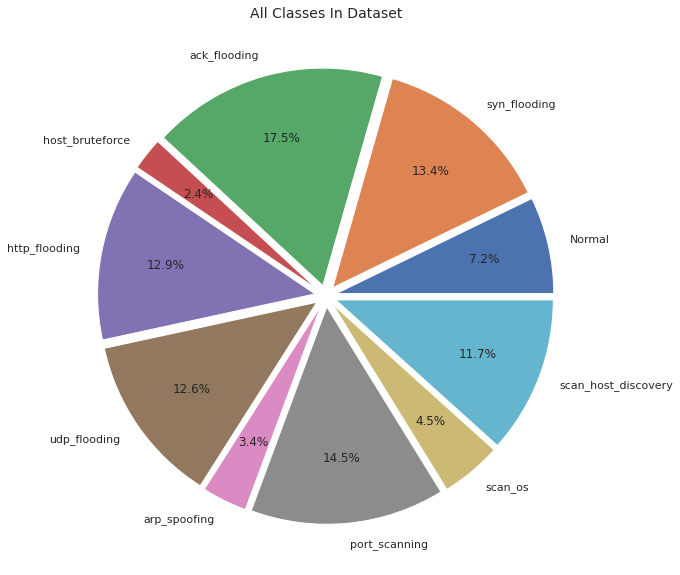

In [ ]:
pie, ax = plt.subplots(figsize=[10,10])
labels = labels
plt.pie(x=pie_chart_data, autopct="%.1f%%", explode=[0.05]*10, labels=labels, pctdistance=0.7)
plt.title("All Classes In Dataset", fontsize=14);
pie.savefig("DeliveryPieChart.png")

## Lets see protocols percentage in different type of traffic flows

In [ ]:
all_data=read_all_data()
df=all_data.groupby(['class','Proto']).agg({'Dur': 'count'})
# Change: groupby state_office and divide by sum
df = df.groupby('class').apply(lambda x:100 * x / x.sum())

df=pd.DataFrame(df).reset_index()
df.rename(columns={'Dur': 'count'}, inplace=True)

df.head()

,class,Proto,count
0,0,arp,3.247480
1,0,icmp,2.351624
2,0,igmp,5.151176
3,0,tcp,66.853303
4,0,udp,16.685330


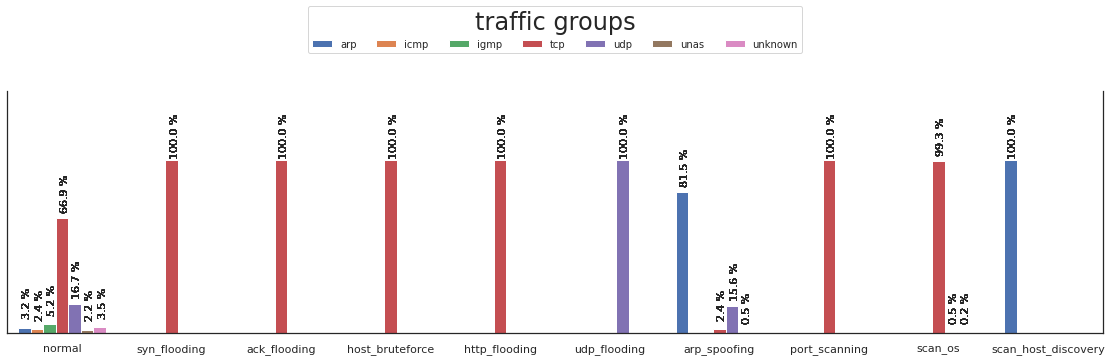

In [ ]:
# plt.figure(figsize=(12,8))
# colors = ["windows blue", "orange red", "grey", "amber","green","yellow","black"]  
# myPalette = sns.xkcd_palette(colors)

traffic_groups=['normal','syn_flooding','ack_flooding',
                       'host_bruteforce','http_flooding',
                       'udp_flooding','arp_spoofing',
                       'port_scanning','scan_os',
                       'scan_host_discovery']

sns.set(style="white") #fondo blanco
g = sns.factorplot(data=df,x='class',y='count',hue='Proto', saturation=1, size=4, aspect=4, kind="bar",
               legend=False) #se suprime la leyenda

g.set(ylim=(0, 140)) 
g.despine(right=False) 
g.set_xlabels("") 
g.set_ylabels("")  
g.set_yticklabels("") 
g.set_xticklabels(traffic_groups)
# g.set_ytick_params(axis='x', rotation=90)


myLegend=plt.legend(bbox_to_anchor=(0., 1.2, 1., .102), prop ={'size':10}, loc=10, ncol=7,  #left, bottom, width, height
                title=r'traffic groups')                    
myLegend.get_title().set_fontsize('24')


ax=g.ax #annotate axis = seaborn axis
def annotateBars(row, ax=ax): 
  for p in ax.patches:
        # p.set_height(p.get_height()*1.2)

        ax.annotate("%.1f" % p.get_height()+" %", (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=11, rotation=90, xytext=(3, 25),textcoords='offset points')  
       


plot = df.apply(annotateBars, ax=ax, axis=1)

## Lets check TCP States changes percentag in flows (this field is provided by Argus when we using -z in "ra" command) of each traffic groups 

In [ ]:
all_data=read_all_data()
df=all_data.groupby(['class','State']).agg({'State':'count'})
df = df.groupby('class').apply(lambda x:100 * x / x.sum())
df.rename(columns={'State': 'count'}, inplace=True)
df=pd.DataFrame(df).reset_index()
df

,class,State,count
0,0,,1.231803
1,0,CON,6.718925
2,0,E,15.229563
3,0,ECO,2.127660
4,0,ECR,0.111982
...,...,...,...
61,8,s,4.278075
62,8,sE,59.180036
63,8,sEf,31.016043
64,8,sf,0.178253


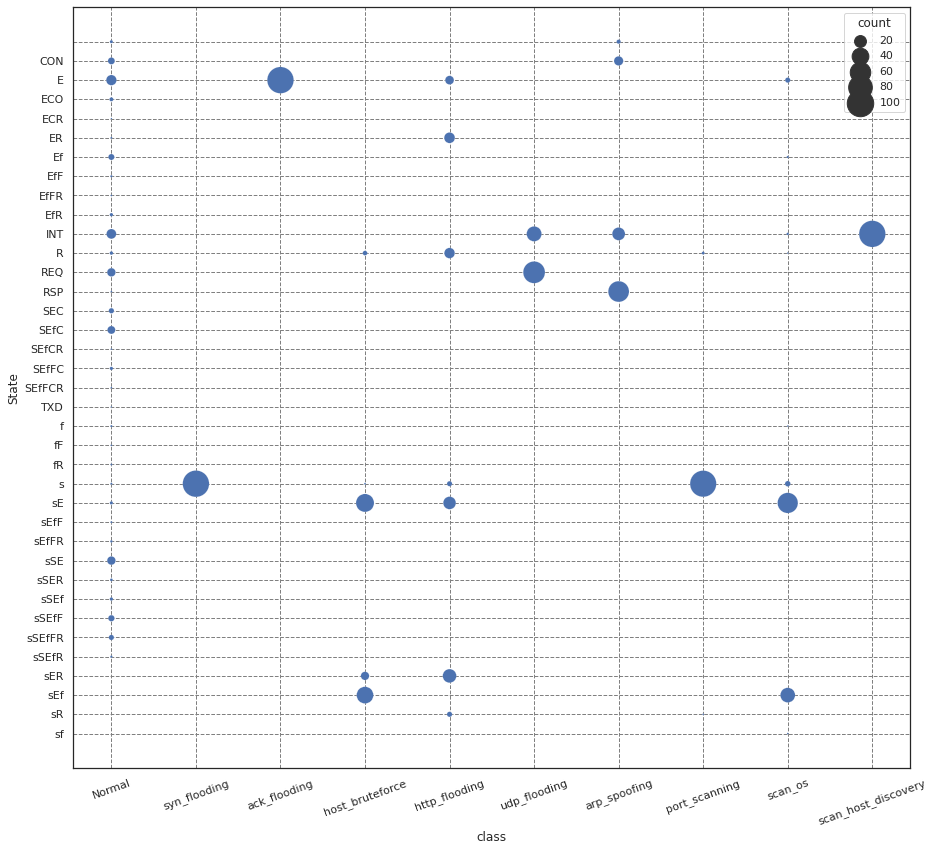

In [ ]:
labels = ['Normal','syn_flooding','ack_flooding',
          'host_bruteforce','http_flooding','udp_flooding',
          'arp_spoofing','port_scanning','scan_os',
          'scan_host_discovery']

plt.figure(figsize=(15,14))
plt.grid() 
fig = sns.scatterplot(data=df,x='class',size='count',y='State',sizes=(2, 700))
fig.set_xticks(np.linspace(0,9,10))
fig.axes.set_xticklabels(labels, rotation=20)
fig.axes.set_axisbelow(True)
fig.axes.yaxis.grid(color='gray', linestyle='dashed')
fig.axes.xaxis.grid(color='gray', linestyle='dashed')

# for tick_label in fig.axes.get_xticklabels():
#     tick_label.set_color("gray")
#     tick_label.set_fontsize("12")

# plt.savefig('1.png', transparent=True)

In [ ]:
os_scan['State'].value_counts()

sR        31459
E          1686
sSEfF      1307
REQ         949
sSE         946
s           896
CON         799
sSR         540
INT         436
sSER        205
R           201
ECO         154
EfR         150
ER          144
sSEfFR       94
URP          68
sSEfR        50
TST          32
MAS          32
SEfFC        11
SEC          11
sSEf         11
sER           8
SR            6
f             4
NRS           2
SEfCR         1
fF            1
SECR          1
Name: State, dtype: int64

## SrcRate/DstRate

In [ ]:
df_src=all_data.groupby(['class']).agg({'SrcRate':'mean'})
df_src=df_src.reset_index()
df_src['SrcRate']+=1

df_dst=all_data.groupby(['class']).agg({'DstRate':'mean'})
df_dst=df_dst.reset_index()
df_dst['DstRate']+=1

df_src['SrcRate']=df_src['SrcRate']/df_dst['DstRate']

df.rename(columns={'SrcRate': 'SrcRate / DstRate'}, inplace=True)

df

,class,SrcRate / DstRate
0,0,0.585417
1,1,86.445934
2,2,28.912423
3,3,22.361830
4,4,162.810012
5,5,402.275212
6,6,0.797989
7,7,34.272075
8,8,370.220232
9,9,23.496140


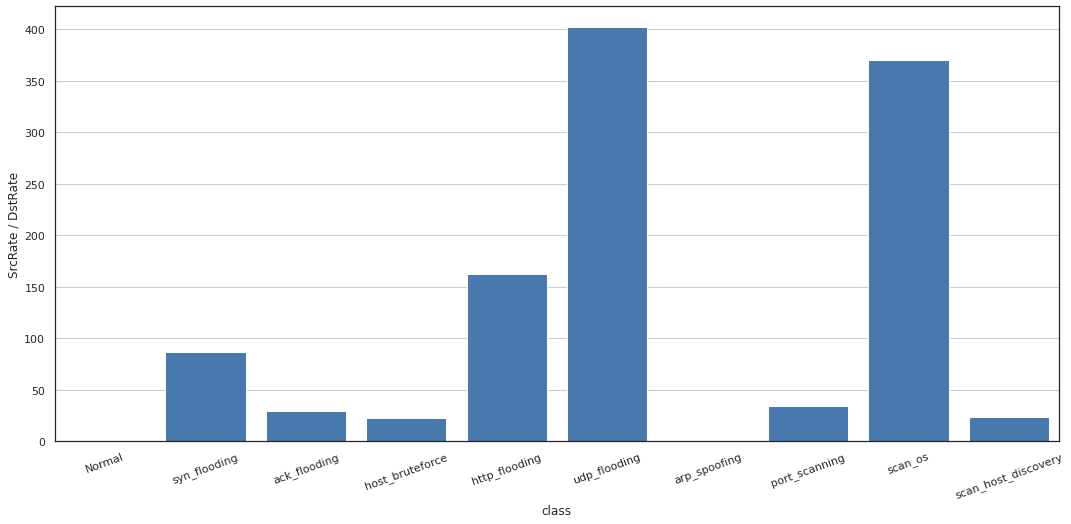

In [ ]:
colors = ["windows blue"]  
myPalette = sns.xkcd_palette(colors)
plt.figure(figsize=(18,8))
plt.grid() 
fig=sns.barplot(data=df,x='class',y='SrcRate / DstRate',palette=myPalette)
fig.set_xticks(np.linspace(0,9,10))
fig.axes.set_xticklabels(labels, rotation=20)
fig.axes.set_axisbelow(True)

# plt.savefig('1.png', transparent=True)

## Mean of "Dur" or any numeric field

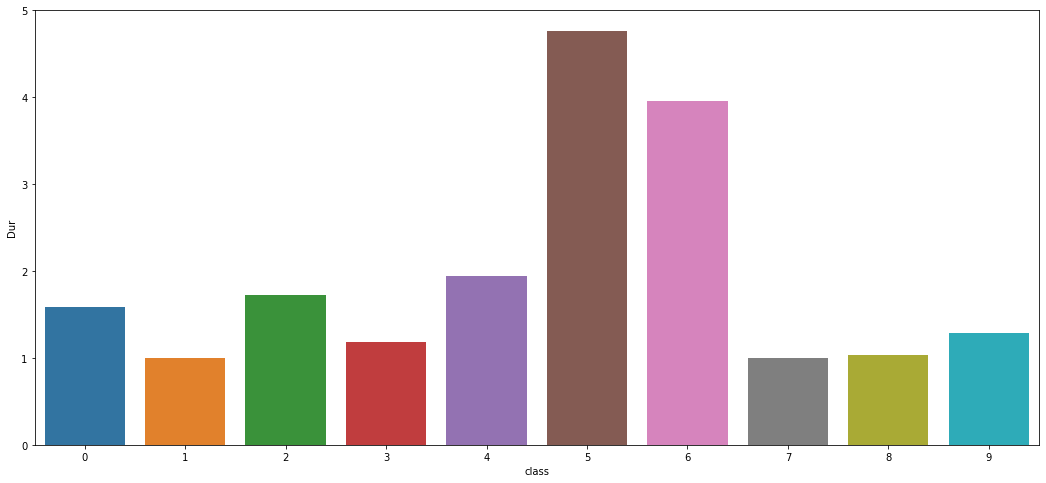

In [ ]:
df_src=all_data.groupby(['class']).agg({'Dur':'mean'})
df_src=df_src.reset_index()
df_src['Dur']+=1

plt.figure(figsize=(18,8))
sns.barplot(data=df_src,x='class',y='Dur')

## "State" culomn encoding

In [ ]:
all_data['State'].value_counts()

s         4801
E         2759
INT       2172
sE        1362
REQ       1153
sER       1084
R          733
ER         631
sEf        295
RSP        259
sR         165
CON        111
sSE         91
SEfC        80
sSEfF       50
Ef          49
SEC         35
sSEfFR      34
            21
ECO         19
sSEf        13
SEfFC       13
EfR         13
sSER         8
sEfFR        6
sSEfR        5
f            5
EfF          5
sEfF         3
fR           3
SEfFCR       2
fF           2
SEfCR        2
EfFR         2
sf           1
TXD          1
ECR          1
Name: State, dtype: int64

### As you can see, the "State" column has special data, according to "ra" documentation, by using "-z" option in Argus command,this field will contain the TCP state changes in each conversation. so we should try to encode this data for training our models

In [ ]:
states=""
for key in (all_data['State'].value_counts()).keys():
  states+=key
#for null values:
states+=" "
# rremoving duplicate characters
states=(list(set(states)))
states

['I',
 ' ',
 'F',
 'N',
 'P',
 'D',
 'T',
 'C',
 'f',
 'O',
 'Q',
 's',
 'S',
 'X',
 'R',
 'E']

In [ ]:
states.index('P')

4

### What I want to do here, is similar to one_hot_encoding, so at first I found all possible chars in "State" field and then we will map avery record's State to 0,1. this is an example:

In [ ]:
# get a dict of chars by their index in above "state" list (we will use this index for one_hoted column's "1" values):
# indexed_char_array={k: v for v, k in enumerate(states)}
# indexed_char_array

In [ ]:
sample_state="sEF R S"

In [ ]:
df=pd.DataFrame(columns=states).add_prefix('State_')
df.loc[0]=0
for i in sample_state:
  df.iloc[0,states.index(i)]=1
display(df)

,State_I,State_,State_F,State_N,State_P,State_D,State_T,State_C,State_f,State_O,State_Q,State_s,State_S,State_X,State_R,State_E
0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1


### Ok Lets implement these steps in a method

In [ ]:
all_data=encode_field(all_data,'State')
# all_data.drop('State',axis=1,inplace=True)

In [ ]:
def encode_field(df,col):

  # gets our dataframe and a column that 
  # should be encoded, so it crates a new
  # dataFrame of encoded columns and joins 
  # it to df. this function can be used 
  # for "State","tcpOpt","Flgs" columns
  #(check "ra" docs for more fields).

  char_array=""
  for key in (df[col].value_counts()).keys():
    char_array+=key
    #for null values:
  char_array+=" "
  char_array=list(set(char_array))
  one_hot=pd.DataFrame(columns=char_array).add_prefix(f"{col}_")


  for i in range(df.shape[0]):
    one_hot.loc[i]=0
    for j in df.loc[i,col]:
        one_hot.iloc[i,char_array.index(j)]=1
  
  one_hot.drop(f"{col}_ ",axis=1,inplace=True)
  return df.drop(col,axis=1).join(one_hot)


In [ ]:
all_data.shape

(20232, 34)

# Feature Selection

In [ ]:
all_data.head()

,SrcAddr,DstAddr,SrcMac,DstMac,Sport,Dport,State,Proto,Dur,SrcRate,DstRate,SrcWin,DstWin,sMeanPktSz,dMeanPktSz,sTtl,dTtl,sHops,dHops,class
0,192.168.0.15,192.168.0.113,f0:18:98:5e:ff:9f,Broadcast,,,INT,arp,0.000000,0.000000,0.0,0.0,0.0,67.000000,0.0,0.0,0.0,0.0,0.0,9
1,192.168.0.15,192.168.0.113,f0:18:98:5e:ff:9f,Broadcast,,,INT,arp,0.305832,9.809307,0.0,0.0,0.0,67.000000,0.0,0.0,0.0,0.0,0.0,9
2,222.178.169.80,192.168.0.13,88:36:6c:f2:ce:a7,bc:1c:81:4b:ae:ba,1397.0,554.0,s,tcp,0.000000,0.000000,0.0,0.0,0.0,98.000000,0.0,64.0,0.0,0.0,0.0,1
3,192.168.0.24,210.89.164.90,04:32:f4:45:17:b3,88:36:6c:d7:1c:56,8877.0,52330.0,E,tcp,0.000000,0.000000,0.0,0.0,0.0,54.000000,0.0,64.0,0.0,0.0,0.0,2
4,fe80::df:76c6:92ef:4d18,ff02::fb,48:4b:aa:2c:d8:f9,33:33:00:00:00:fb,5353,5353,INT,udp,0.253422,31.567900,0.0,0.0,0.0,192.111115,0.0,255.0,0.0,1.0,0.0,0


In [ ]:
all_data=read_all_data()

# this code will take a bit long!
all_data=encode_field(all_data,'State')

all_data.head()

,SrcAddr,DstAddr,SrcMac,DstMac,Sport,Dport,Proto,Dur,SrcRate,DstRate,sMeanPktSz,dMeanPktSz,class,State_D,State_s,State_E,State_R,State_S,State_C,State_F,State_Q,State_P,State_T,State_f,State_O,State_X,State_I,State_N
0,192.168.0.16,192.168.0.13,48:4b:aa:2c:d8:f9,bc:1c:81:4b:ae:ba,49790,9010,tcp,0.065393,198.798035,168.213715,136.571426,138.5,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0
1,192.168.0.15,192.168.0.13,f0:18:98:5e:ff:9f,bc:1c:81:4b:ae:ba,52143.0,7004.0,tcp,0.000000,0.000000,0.000000,102.000000,0.0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,192.168.0.15,192.168.0.13,f0:18:98:5e:ff:9f,bc:1c:81:4b:ae:ba,52143.0,9415.0,tcp,0.000000,0.000000,0.000000,102.000000,0.0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,222.24.23.68,192.168.0.13,88:36:6c:f2:ce:a7,bc:1c:81:4b:ae:ba,3484.0,554.0,tcp,0.000000,0.000000,0.000000,102.000000,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,192.168.0.13,210.89.164.90,bc:1c:81:4b:ae:ba,88:36:6c:d7:1c:56,51994.0,8899.0,udp,4.941707,172.410049,0.000000,74.000000,0.0,5,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0


## NOTE: After many Iterations we found that we can use only ['SrcRate','DstRate','State'] features for good binary classification, and for multiclass classification you can add "Proto" to feature set

In [ ]:
# this block is just for multiClass classification
x=all_data.drop(['class','SrcAddr','SrcMac', 'DstMac','DstAddr','Sport','Dport','sMeanPktSz','dMeanPktSz','Dur'],axis=1)
y=all_data['class']


LE=LabelEncoder()
protos=LE.fit_transform(x['Proto'])
x['Proto']=protos

In [ ]:
# this block is just for binary classification

anomalies=all_data[all_data['class']!=0]
normal=all_data[all_data['class']==0]

anomalies['class']=1

all_data_binary=normal.append(anomalies)
all_data_binary=shuffle(all_data_binary)

x=all_data_binary.drop(['class','SrcAddr','SrcMac', 'DstMac','DstAddr','Sport','Dport','sMeanPktSz','dMeanPktSz','Dur'],axis=1)

LE=LabelEncoder()
protos=LE.fit_transform(x['Proto'])
x['Proto']=protos
y=all_data_binary['class']



In [ ]:
# x['SrcRate/DstRate']=(x['SrcRate']+1)/(x['DstRate']+1)

# x=x.drop(['SrcRate','DstRate'],axis=1)

In [ ]:
x

,Proto,SrcRate,DstRate,State_I,State_P,State_R,State_E,State_F,State_D,State_f,State_O,State_T,State_N,State_C,State_X,State_S,State_Q,State_s
0,3,198.798035,168.213715,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1
1,3,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,172.410049,0.000000,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12396,3,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12397,3,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12398,3,0.974896,0.000000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
12399,3,0.467255,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# x.to_csv("dataset_binary.csv",index=False)

## Comparing Models

### Hyperparameters and piplines

In [ ]:
cat_cols=['Proto']
num_cols=(x.drop(cat_cols,axis=1)).columns 

num_cols=x.columns

#if classification is just for two classes(normal/anomalies),
#this property should be "2" ,otherwise it should be 10
# -> just for MLPC last layer nodes
num_class=10


seed = 42

lr_hyperparameters = {
    'lr__C': [0.01, 0.1, 1.0, 10,20,50, 100]
}

rf_hyperparameters = {
    'rf__n_estimators': np.arange(20,100,10),
    'rf__max_depth': [2,4,6,8,10,12,14,16],
    'rf__criterion':['gini', 'entropy'],

}

xgb_hyperparameters = {
    'xgb__max_depth': np.arange(2,12,2),  # the maximum depth of each tree
    'xgb__learning_rate': [0.1,0.3],  # the training step for each iteration
    'xgb__n_estimators': np.arange(1,80,10),
}

lgbm_hyperparameters = {
    'lgbm__n_estimators': np.arange(10,140,20),
    'lgbm__min_data_in_leaf': np.arange(100,1000,100),
    'lgbm__max_depth': np.arange(2,10,2),

}

hgb_hyperparameters= {
    'hgb__learning_rate' : [0.01, 0.1, 1, 10],
    'hgb__max_leaf_nodes' : [3, 10, 30]
}

ridge_hyperparameters={
    'ridge__alpha':[0.001, 0.1, 1,10,1000]
}

svm_hyperparameters = {'C': [0.1,1, 10, 100],
                       'gamma': [1,0.1,0.01,0.001],
                       'kernel': ['rbf', 'poly', 'sigmoid']
                       }


DT_hyperparameters = {
    'DT__criterion':['gini', 'entropy'],
    'DT__max_depth':[2,4,6,8,10,12,14,16]
                      }

hyperparameters = {
    'lr': lr_hyperparameters,
    'rf': rf_hyperparameters,
    'lgbm': lgbm_hyperparameters,
    'xgb': xgb_hyperparameters,
    'hgb': hgb_hyperparameters,
    'ridge':ridge_hyperparameters,
    'svm': svm_hyperparameters,
    'DT': DT_hyperparameters
}

#different preprocessors for different types of models
#one_hot_encoding makes tree_based models worse!(except xgboost)
#and also tree-based models doesn't have to get standard inputs:


non_tree_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=0)),
    ('scaler', StandardScaler())])
    
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=0)),
    # ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    
#tree_categorical_transformer = SimpleImputer(strategy='most_frequent')

tree_numeric_transformer = SimpleImputer(strategy='constant',fill_value=0)

    

non_tree_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, cat_cols),
    ('num', non_tree_numeric_transformer, num_cols)
    ],remainder='passthrough', sparse_threshold=0)
    

tree_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, cat_cols),
    ('num', tree_numeric_transformer, num_cols)
    ],remainder='passthrough', sparse_threshold=0)



# Pipeline of ML classifier's pipielines
pipelines = {
    # 'bl': Pipeline(steps=[('bl', DummyClassifier(strategy='most_frequent'))]), # base line
    'lr': Pipeline(steps=[('preprocessor_lr', non_tree_preprocessor),('lr',LogisticRegression(random_state=seed,penalty='l2'))]),
    'rf': Pipeline(steps=[('preprocessor_rf',tree_preprocessor),('rf', RandomForestClassifier(random_state=seed))]),
    # 'xgb': Pipeline(steps=[('preprocessor_xgb',tree_preprocessor),('xgb', XGBClassifier(random_state=seed))]),
    # 'svm': Pipeline(steps=[('preprocessor_svm',none_tree_preprocessor),('svm', SVC(random_state=seed))]),
    'DT': Pipeline(steps=[('preprocessor_DT',tree_preprocessor),('DT', DecisionTreeClassifier(random_state=seed))]),
    'MLPC': Pipeline(steps=[('preprocessor_MLPC', non_tree_preprocessor),('MLPC',MLPClassifier(random_state=seed,
                                                                                               max_iter=100,solver='lbfgs',activation='logistic',hidden_layer_sizes=(30,10,num_class) ))]),
    # 'knn': Pipeline(steps=[('preprocessor_knn',none_tree_preprocessor),('knn', KNeighborsClassifier(random_state=seed))]),


    # 'lgbm': Pipeline(steps=[('preprocessor_lgbm', non_tree_preprocessor),('lgbm', LGBMClassifier(random_state=seed, n_jobs=-1))]),
    # 'hgb': Pipeline(steps=[('preprocessor_xgb',tree_preprocessor),('hgb', HistGradientBoostingClassifier(random_state=seed))]),##is tree based??
#has no proba ==> 'ridge': Pipeline(steps=[('preprocessor_ridge',non_tree_preprocessor),('ridge', Ridge(random_state=seed))]), 

}

In [ ]:
x.head()

### Cross-Validating models and save best estimators on Gdrive. (skip this part if you have models on Ur GDrive)

In [ ]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
cd  ../../gdrive/MyDrive/

/gdrive/MyDrive


In [ ]:
# Start the GridSearch process

model_names = {"bl":"Baseline", "lr": "Logistic Regression" ,
               "rf":"Random Forest", "ridge":"Ridge Regression",
               "xgb": "XGBoost", "lgbm": "Light Gradient Boosting",
               "hgb":"Hist Gradient Boosting","svm":"SVM",
               "DT":"Decision Tree","knn":"KNN","MLPC":"MLPC"}


results_row=0

scoring_binary = 'roc_auc'
scoring_multi= 'accuracy'


for key, pipeline in tqdm(pipelines.items()):

    cv=KFold(n_splits=5,shuffle=True)
    
    print(f"key :   {key}")
    if key == 'bl' or key =='MLPC':
        model = pipeline
    else:
        model = GridSearchCV(pipeline, param_grid=hyperparameters[key], cv=cv,n_jobs=-1,scoring =scoring_multi)
    
    model.fit(x,y)
    if hasattr(model,'best_estimator_'):
        best = model.best_estimator_
    else:
        best = model
    
          # Save the model
    model_name=f'{model_names[key]}.joblib'
    joblib.dump(best, model_name)
    

  0%|          | 0/4 [00:00<?, ?it/s]

key :   lr
key :   rf
key :   DT
key :   MLPC


### Load models frome GDrive and print their parameters

In [ ]:
models=['Logistic Regression','Random Forest','Decision Tree','MLPC']

for model_name in models:

  model = joblib.load(f"{model_name}.joblib")
  print(f"selected model is {model_name}.\n")
  print("Its parameters are:")
  print(model.get_params())

selected model is Logistic Regression.

Its parameters are:
{'memory': None, 'steps': [('preprocessor_lr', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0,
                  transformer_weights=None,
                  transformers=[('cat',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=0,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0))],
                                          verbose=False),
                                 ['Proto']),
                             

### Creating models with best choosen params and comparing theme

In [ ]:
# x=all_data.drop(['class','SrcAddr','SrcMac', 'DstMac','DstAddr','Sport','Dport'],axis=1)
# y=all_data['class']

# x=x.drop(['sMeanPktSz','dMeanPktSz','Dur'],axis=1)

# LE=LabelEncoder()
# protos=LE.fit_transform(x['Proto'])
# x['Proto']=protos

In [ ]:
x.head()

,SrcRate,DstRate,State_X,State_R,State_O,State_D,State_C,State_N,State_Q,State_f,State_P,State_T,State_E,State_F,State_S,State_I,State_s
8805,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12360,0.000000,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1277,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11237,32.413586,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
8752,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:

cat_cols=['Proto'] 
num_cols=(x.drop(cat_cols,axis=1)).columns 

num_cols=x.columns

#if classification is just for two classes(normal/anomalies),
#this property should be "2" ,otherwise it should be 10
# -> just for MLPC last layer nodes
num_class=10


non_tree_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, cat_cols), 
    ('num', non_tree_numeric_transformer, num_cols)
    ],remainder='passthrough', sparse_threshold=0)
    

tree_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, cat_cols), 
    ('num', tree_numeric_transformer, num_cols)
    ],remainder='passthrough', sparse_threshold=0)

seed=42

lr_c=20
lr_max_iter=100

rf_max_depth=14
rf_criterion='entropy'
rf_n_estimators=30

DT_max_depth=14
DT_criterion='entropy'

MLPC_max_iter=100
MLPC_activation='logistic'
MLPC_solver='lbfgs'
MLPC_hidden_layer_sizes=(3,10,num_class)

# Pipeline of ML classifier's pipielines
pipelines = {
    'lr': Pipeline(steps=[('preprocessor_lr', non_tree_preprocessor),('lr',LogisticRegression(random_state=seed,C=lr_c,max_iter=lr_max_iter))]),
    'rf': Pipeline(steps=[('preprocessor_rf',tree_preprocessor),('rf', RandomForestClassifier(random_state=seed,criterion=rf_criterion,max_depth=16,n_estimators=rf_n_estimators))]),
    'DT': Pipeline(steps=[('preprocessor_DT',tree_preprocessor),('DT', DecisionTreeClassifier(random_state=seed,criterion=DT_criterion,max_depth=DT_max_depth))]),
    'MLPC': Pipeline(steps=[('preprocessor_MLPC', non_tree_preprocessor),('MLPC',MLPClassifier(random_state=seed,
                                                                                               max_iter=MLPC_max_iter,solver=MLPC_solver,
                                                                                               activation=MLPC_activation,hidden_layer_sizes=MLPC_hidden_layer_sizes ))])
}


In [ ]:
x.head(2)

,Proto,SrcRate,DstRate,State_C,State_O,State_R,State_X,State_T,State_P,State_s,State_D,State_N,State_f,State_I,State_S,State_E,State_Q,State_F
0,3,198.798035,168.213715,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0
1,3,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
y.value_counts()

2    2174
7    1792
1    1658
4    1596
5    1562
9    1448
0     893
8     561
6     416
3     301
Name: class, dtype: int64

In [ ]:
# Start the cross_val process

results_df=pd.DataFrame(columns=['model','score','training time'])

model_names = {"lr": "Logistic Regression" ,
               "rf":"Random Forest",
               "DT":"Decision Tree",
               "MLPC":"MLPC"}

results_row=0


for key, pipeline in tqdm(pipelines.items()):

    print(key)

    cv=KFold(n_splits=5,shuffle=True)

    
    model=pipeline

    t1=datetime.datetime.now()

    score=cross_val_score(model,X=x,y=y,cv=cv,n_jobs=2,scoring=scoring_multi).mean()

    t2=datetime.datetime.now()

    time=t2-t1

    results_df.loc[results_row]=[
        model_names[key],
        score,
        time.total_seconds()
        ]
    results_row+=1

results_df =results_df.round(4)
display(results_df)

  0%|          | 0/4 [00:00<?, ?it/s]

lr
rf
DT
MLPC


,model,score,training time
0,Logistic Regression,0.7466,3.9121
1,Random Forest,0.8011,1.3913
2,Decision Tree,0.7995,0.3552
3,MLPC,0.4840,7.7457


## As we can see in above table, the Decision Tree works good. It can be a better choice for SparkML too (we should check it of course). So we will just use DT model for feature selection

## Feature Selection using best model's(DT) feature_importance(if it has such method)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42,stratify=y)



score: 0.9763504434291858
Feature: 0, Score: 0.14847
Feature: 1, Score: 0.43960
Feature: 2, Score: 0.06827
Feature: 3, Score: 0.01386
Feature: 4, Score: 0.04314
Feature: 5, Score: 0.04360
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00457
Feature: 8, Score: 0.08183
Feature: 9, Score: 0.06176
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00116
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.01654
Feature: 15, Score: 0.00918
Feature: 16, Score: 0.06800


[Text(0, 0, 'SrcRate'),
 Text(0, 0, 'DstRate'),
 Text(0, 0, 'State_s'),
 Text(0, 0, 'State_T'),
 Text(0, 0, 'State_E'),
 Text(0, 0, 'State_S'),
 Text(0, 0, 'State_X'),
 Text(0, 0, 'State_N'),
 Text(0, 0, 'State_C'),
 Text(0, 0, 'State_F'),
 Text(0, 0, 'State_P'),
 Text(0, 0, 'State_I'),
 Text(0, 0, 'State_D'),
 Text(0, 0, 'State_O'),
 Text(0, 0, 'State_f'),
 Text(0, 0, 'State_R'),
 Text(0, 0, 'State_Q')]

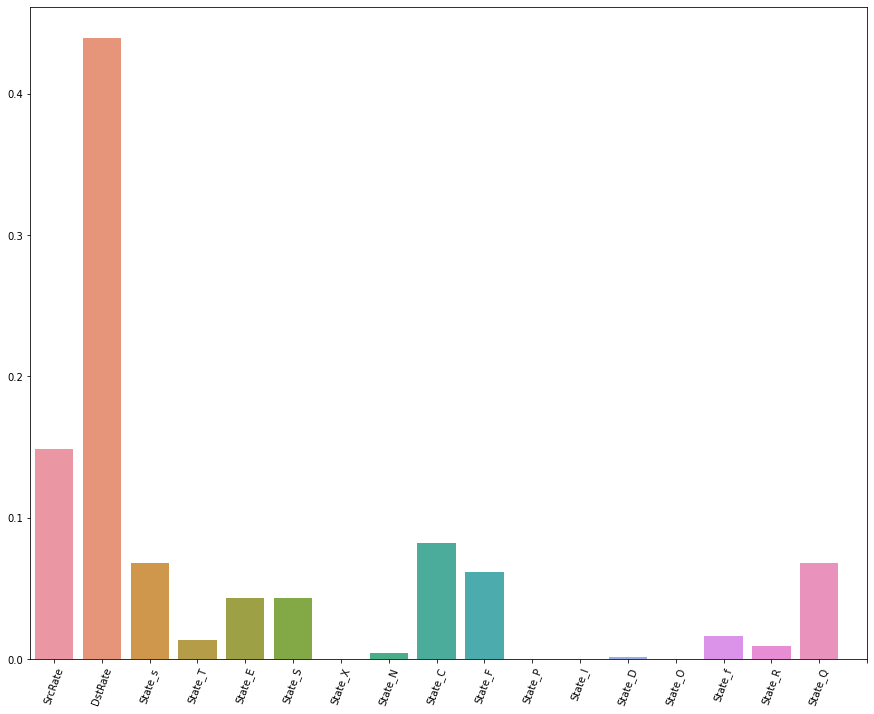

In [ ]:
DT=DecisionTreeClassifier(random_state=seed,criterion='entropy',max_depth=16)
DT.fit(X_train,y_train)

print(f'score: {DT.score(X_test,y_test)}')
importance = DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.figure(figsize=(15,12))
fig=sns.barplot([x for x in range(len(importance))], importance)
fig.set_xticks(np.linspace(0,x.columns.size,x.columns.size+1))
fig.axes.set_xticklabels(x.columns, rotation=70)


## NOTE : After many iterations we choos above features (SrcRate,DstRate,State)

### Here we save our new dataset for using in SparkML

In [ ]:

data=all_data.drop(['sMeanPktSz','dMeanPktSz','Dur'],axis=1)

In [ ]:
data.head()

,SrcAddr,DstAddr,SrcMac,DstMac,Sport,Dport,State,Proto,SrcRate,DstRate,class
0,192.168.0.16,192.168.0.13,48:4b:aa:2c:d8:f9,bc:1c:81:4b:ae:ba,49790,9010,sSEfR,tcp,198.798035,168.213715,0
1,192.168.0.15,192.168.0.13,f0:18:98:5e:ff:9f,bc:1c:81:4b:ae:ba,52143.0,7004.0,s,tcp,0.000000,0.000000,7
2,192.168.0.15,192.168.0.13,f0:18:98:5e:ff:9f,bc:1c:81:4b:ae:ba,52143.0,9415.0,s,tcp,0.000000,0.000000,7
3,222.24.23.68,192.168.0.13,88:36:6c:f2:ce:a7,bc:1c:81:4b:ae:ba,3484.0,554.0,s,tcp,0.000000,0.000000,1
4,192.168.0.13,210.89.164.90,bc:1c:81:4b:ae:ba,88:36:6c:d7:1c:56,51994.0,8899.0,REQ,udp,172.410049,0.000000,5


In [ ]:
data.to_csv("all_data.csv",index=False)

## Lets check Correlations (if its needed)


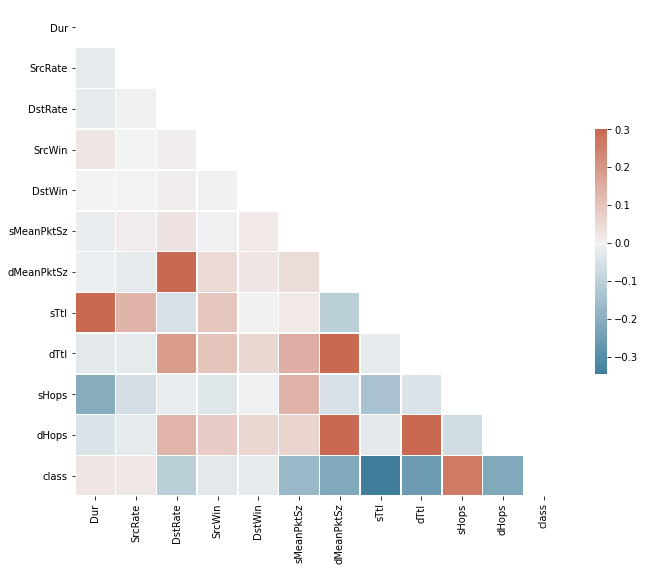

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr=all_data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Lets plot our Tree

In [ ]:
from sklearn import tree

classes = ['Normal','syn_flooding','ack_flooding',
          'host_bruteforce','http_flooding','udp_flooding',
          'arp_spoofing','port_scanning','scan_os',
          'scan_host_discovery']

plt.figure(figsize=(150,40))
tree.plot_tree(DT, fontsize=10,feature_names=x.columns,  
                   class_names=classes,
                   filled=True)
plt.savefig('tree_high_dpi', dpi=350)


NameError: ignored

In [ ]:
def calc_auc_roc(y, prob_pred):
  return roc_auc_score(y, prob_pred)

In [ ]:
def calc_accuracy(y, prob_pred):
  return accuracy_score(y, prob_pred,normalize=False)

In [ ]:
x=all_data.drop(['class','SrcAddr','SrcMac', 'DstMac','DstAddr','Sport','Dport'],axis=1)
y=all_data['class']

In [ ]:
data=one_hot_scale_imputer(x,_,_)

In [ ]:
data.head()

,Proto_arp,Proto_icmp,Proto_igmp,Proto_tcp,Proto_udp,Proto_unas,Proto_unknown,State_T_0,State_T_1,State_N_0,State_N_1,State_R_0,State_R_1,State_F_0,State_F_1,State_I_0,State_I_1,State_f_0,State_f_1,State_Q_0,State_Q_1,State_s_0,State_s_1,State_D_0,State_D_1,State_C_0,State_C_1,State_S_0,State_S_1,State_X_0,State_X_1,State_E_0,State_E_1,State_P_0,State_P_1,State_O_0,State_O_1,Dur,SrcRate,DstRate,SrcWin,DstWin,sMeanPktSz,dMeanPktSz,sTtl,dTtl,sHops,dHops
0,-0.314022,-0.032234,-0.047737,0.474335,-0.310495,-0.033736,-0.039174,0.346883,-0.346883,0.356642,-0.356642,0.291249,-0.291249,0.076266,-0.076266,0.346794,-0.346794,0.172252,-0.172252,0.245831,-0.245831,-0.949852,0.949852,0.007031,-0.007031,0.114762,-0.114762,0.173616,-0.173616,0.007031,-0.007031,0.807964,-0.807964,0.113875,-0.113875,0.080418,-0.080418,-0.421865,-0.171331,-0.052661,-0.090069,-0.011966,0.079670,-0.130365,-0.353988,-0.143062,1.557699,-0.122153
1,3.184489,-0.032234,-0.047737,-2.108213,-0.310495,-0.033736,-0.039174,-2.882816,2.882816,-2.803930,2.803930,0.291249,-0.291249,0.076266,-0.076266,-2.883560,2.883560,0.172252,-0.172252,0.245831,-0.245831,1.052796,-1.052796,0.007031,-0.007031,0.114762,-0.114762,0.173616,-0.173616,0.007031,-0.007031,0.807964,-0.807964,0.113875,-0.113875,0.080418,-0.080418,-0.207573,-0.165222,-0.052661,-0.090069,-0.011966,-0.225957,-0.130365,-2.000561,-0.143062,-0.389580,-0.122153
2,-0.314022,-0.032234,-0.047737,-2.108213,3.220665,-0.033736,-0.039174,-2.882816,2.882816,-2.803930,2.803930,0.291249,-0.291249,0.076266,-0.076266,-2.883560,2.883560,0.172252,-0.172252,0.245831,-0.245831,1.052796,-1.052796,0.007031,-0.007031,0.114762,-0.114762,0.173616,-0.173616,0.007031,-0.007031,0.807964,-0.807964,0.113875,-0.113875,0.080418,-0.080418,0.649866,0.542003,-0.052661,-0.090069,-0.011966,-0.164832,-0.130365,2.132015,-0.143062,-0.389580,-0.122153
3,3.184489,-0.032234,-0.047737,-2.108213,-0.310495,-0.033736,-0.039174,-2.882816,2.882816,-2.803930,2.803930,0.291249,-0.291249,0.076266,-0.076266,-2.883560,2.883560,0.172252,-0.172252,0.245831,-0.245831,1.052796,-1.052796,0.007031,-0.007031,0.114762,-0.114762,0.173616,-0.173616,0.007031,-0.007031,0.807964,-0.807964,0.113875,-0.113875,0.080418,-0.080418,-0.421865,-0.171331,-0.052661,-0.090069,-0.011966,-0.225957,-0.130365,-2.000561,-0.143062,-0.389580,-0.122153
4,-0.314022,-0.032234,-0.047737,0.474335,-0.310495,-0.033736,-0.039174,0.346883,-0.346883,0.356642,-0.356642,0.291249,-0.291249,0.076266,-0.076266,0.346794,-0.346794,0.172252,-0.172252,0.245831,-0.245831,1.052796,-1.052796,0.007031,-0.007031,0.114762,-0.114762,0.173616,-0.173616,0.007031,-0.007031,-1.237679,1.237679,0.113875,-0.113875,0.080418,-0.080418,-0.421865,-0.171331,-0.052661,-0.058389,-0.011966,-0.339476,-0.130365,0.065727,-0.143062,-0.389580,-0.122153


In [ ]:
# !pip install pca
# clear_output()
# Import libraries
import numpy as np
import pandas as pd
from pca import pca


# Initialize
model = pca(n_components=0.99)
# Fit transform
out = model.fit_transform(data)

# Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'][:30])


[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [99.0%] explained variance using the [48] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [24] that covers the [99.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[24]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
      PC        feature   loading  type
0    PC1      State_N_1  0.341632  best
1    PC2      State_R_0 -0.312045  best
2    PC3           dTtl  0.284427  best
3    PC4      State_D_0 -0.487745  best
4    PC5      State_O_0  0.360300  best
5    PC6      State_P_0  0.321274  best
6    PC7      State_s_0 -0.378560  best
7    PC8        DstRate  0.451797  best
8    PC9      State_f_0  0.503376  best
9   PC10     sMeanPktSz  0.595245  best
10  PC11     Proto_igmp -0.479359  best
11  PC12  Proto_unknown -0.564045  best
12  P

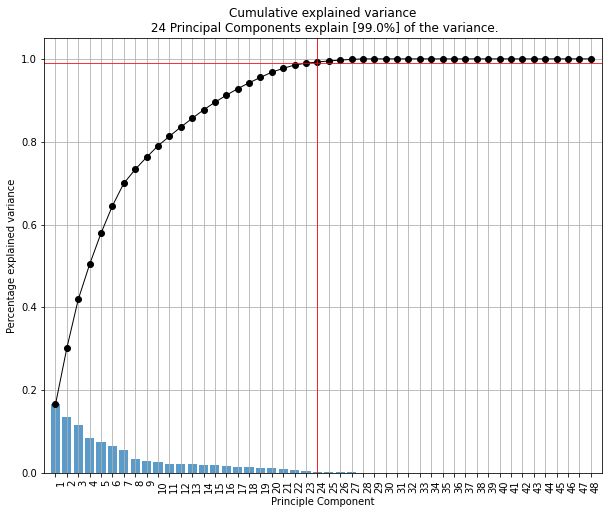

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5f47c6ef50>)

<Figure size 432x288 with 0 Axes>

In [ ]:
model.plot()

In [ ]:
def one_hot_scale_imputer(data,categorical_columns,numerical_columns):
    
#     We apply OHE when:

#     1.When the values that are close to each other in the label 
#       encoding correspond to target values that aren't close (non - linear data).
#     2.When the categorical feature is not ordinal (dog,cat,mouse).


    categorical_columns = selector(dtype_include=object)(data)
    data_categorical = data[categorical_columns]

    numerical_columns = selector(dtype_include=np.number)(data)
    data_numerical = data[numerical_columns]


    categorical_imputer=SimpleImputer(strategy='constant',fill_value="")
    data_categorical=categorical_imputer.fit_transform(data_categorical)

    encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
    data_categorical = encoder.fit_transform(data_categorical)


    numerical_imputer=SimpleImputer(strategy='constant',fill_value=0)
    data_numerical=numerical_imputer.fit_transform(data_numerical)


    data_numerical = pd.DataFrame(data_numerical, columns=numerical_columns)



    feature_names = encoder.get_feature_names(input_features=categorical_columns)
    data_categorical = pd.DataFrame(data_categorical, columns=feature_names)



    all_data=data_categorical.join(data_numerical)

    scaler=StandardScaler()

    data=pd.DataFrame(data=scaler.fit_transform(all_data),columns=all_data.columns)
    return data
    
    

# Test [IOT-Bot-DATASET](https://research.unsw.edu.au/projects/bot-iot-dataset) 

### download :

In [ ]:
# installing axel first
!apt install axel
clear_output()

In [ ]:
# pcap files links

!axel -n 10 --output='http_dos.pcap' 'https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE/download?path=%2FPCAPs%2FDoS%2FDoS_HTTP&files=IoT_Dataset_HTTP_DoS__00006_20180604153831.pcap'
!axel -n 10 --output='service_scan.pcap' 'https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE/download?path=%2FPCAPs%2FScan%2FService&files=IoT_Dataset_ServiceScan__00002_20180515105815.pcap'
!axel -n 10 --output='http_dos_2.pcap' 'https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE/download?path=%2FPCAPs%2FDoS%2FDoS_HTTP&files=IoT_Dataset_HTTP_DoS__00003_20180604151522.pcap&downloadStartSecret=33u25udssvf'
!axel -n 10 --output='udp_dos.pcap' 'https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE/download?path=%2FPCAPs%2FDoS%2FDoS_UDP&files=IoT_Dataset_UDP_DoS__00003_20180604140300.pcap'
!axel -n 10 --output='os_scan.pcap' 'https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE/download?path=%2FPCAPs%2FScan%2FOS%2F2&files=IoT_Dataset_OSScan__00002_20180521193225.pcap'
clear_output()



### or mount from GDrive :

In [ ]:
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
cd  /content

/content


In [ ]:
!cp '../../gdrive/MyDrive/pcaps.zip' '/content/sample_data/' 

In [ ]:
cd /content/sample_data/

/content/sample_data


In [ ]:
!unzip  'pcaps.zip'

In [ ]:
!gunzip -r 'pcaps'

In [ ]:
cd /content/sample_data/pcaps

/content/sample_data/pcaps


In [ ]:
g('/content/sample_data/pcaps/*.pcap')

['/content/sample_data/pcaps/http_dos_2.pcap',
 '/content/sample_data/pcaps/udp_dos.pcap',
 '/content/sample_data/pcaps/http_dos.pcap',
 '/content/sample_data/pcaps/os_scan.pcap',
 '/content/sample_data/pcaps/service_scan.pcap']

In [ ]:
import os
from glob import glob as g
import pandas as pd
from tqdm.notebook import tqdm

pcaps = g('/content/sample_data/pcaps/*.pcap')


for file in tqdm(pcaps):

  name=(file.split('/')[-1]).split('.')[0]

  pcap_file=f"{name}.pcap"
  argus_file=f"{name}.argus"
  csv_file=f"{name}.csv"
  csv_directory_path="/content/sample_data/pcaps/"
  output_path=os.path.join(csv_directory_path ,csv_file ) 

  !argus -r $pcap_file -m -w $argus_file

  !ra -r $argus_file -z -s \
  saddr daddr  smac dmac sport dport state \
  proto srate drate \
  -c , > $output_path

  !rm $argus_file
  # stos dtos

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
from sklearn.utils import shuffle
# udp_dos=http_dos.append(http_dos_2)
udp_dos=shuffle(udp_dos)

# TEST=TEST.drop(['dMeanPktSz','sMeanPktSz','Dur'],axis=1)
udp_dos.to_csv("udp_dos.csv",index=False)

In [ ]:
!zip udp_dos.zip 'udp_dos.csv'

  adding: udp_dos.csv (deflated 88%)


In [ ]:
cd /content/sample_data/pcaps

/content/sample_data/pcaps


In [ ]:
os_scan=pd.read_csv('os_scan.csv')
service_scan=pd.read_csv('service_scan.csv')
udp_dos=pd.read_csv('udp_dos.csv')
http_dos=pd.read_csv('http_dos.csv')
http_dos_2=pd.read_csv('http_dos_2.csv')

print('os_scan',os_scan.shape)
print('service_scan',service_scan.shape)
print('udp_dos',udp_dos.shape)
print('http_dos',http_dos.shape)
print('http_dos_2',http_dos_2.shape)

os_scan (40417, 10)
service_scan (9571, 10)
udp_dos (1305812, 10)
http_dos (763, 10)
http_dos_2 (24049, 10)
